# Introdução

<br>

Data Science está em ascensão globalmente no mercado de TI. Avanços em computação distribuída tem tornado viável a exploração dos vastos volumes de dados gerados diariamente com ferramentas como o Hadoop por exemplo. Métodos de Big Data são essenciais para tratar, analisar e obter informações desses conjuntos vastos de dados. Data Science é uma ferramenta imprescindível para tornar os negócios mais competitivos ao aprimorar significativamente a tomada de decisões estratégicas das organizações. 
<br>
<br>
São fascinantes os insights que aplicações de Data Science pode prover. A descoberta de padrões nos dados, a quantificação de relacionamentos entre determinadas variáveis de um problema, a predição de informações. Tudo isso tem um potencial incrível e diariamente tem afetado a sociedade de formas antes imaginadas apenas em obras de literatura fantastica (obras essas, Neuromancer de W. Gibson, que me fascinam igualmente diga-se de passagem).
<br>
Estou estudando Data Science avidamente. O curso da IBM na Coursera tem sido de extremamente valoroso. Este é meu primeiro Jupyter Notebook e nele vou demonstrar alguns conhecimentos de estatística e visualização de dados para analisar a base [Data Science Salaries 2023 - Kaggle](https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
sns.set(color_codes=True)

# Data integration and transformation


In [ ]:
data_frame = pd.read_csv("/content/ds_salaries.csv")
data_frame.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
data_frame.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
data_frame[data_frame.duplicated()].shape

(1171, 11)

No contexto do dataset faz sentido que haja dados duplicados. É totalmente plausível que dois cientistas de dados em situações empregatícias semelhantes recebam o mesmo salário. **Portanto não removerei dados duplicados.**

Usar pandas.core.frame.DataFrame.drop_duplicates() para dropar duplicatas.

In [ ]:
data_frame.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

**Não há dados faltantes.** Para o caso de haver dados faltantes há algumas ações diferentes a se tomar. É comum substituir os dados faltantes pela média da coluna em questão ou por uma média contextualizada. Dropar os registros que possuem dados faltantes também é uma opção. A ação mais apropriada a ser tomada depende inteiramente da natureza do problema e das características do dataset.

Usar pandas.core.frame.DataFrame.dropna() para dropar registros que contenha valores nulo.

# Outliers

Outliers são valores aberrantes, que diferem muito dos outros valores da série, podem ser consequências de erros na coleta de dados ou da variância dos dados. Podem trazer prejuízos as interpretações estatísticas. Utilizarei de diagramas de caixa para visualizar os quartis e encontrar outliers.

<Axes: xlabel='salary_in_usd'>

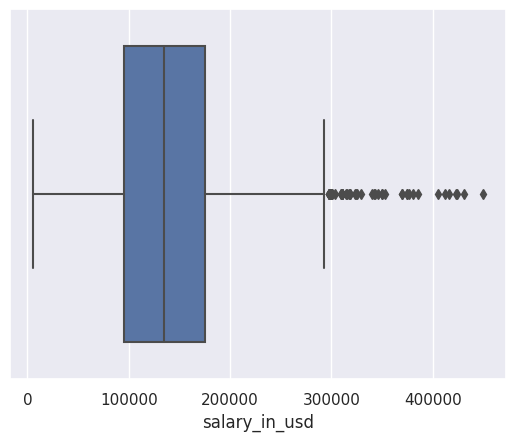

In [ ]:
sns.boxplot(x=data_frame['salary_in_usd'])

Há outliers após o limite superior. Há ocorrência discrepantes de valores de salary_usd no intervalo [~295000, ~470000]. Devido a natureza do dataset, é razoável considerar que tais valores são referentes a salários de cientistas de dados altamente requisitados e não erros de coleta.

<Axes: xlabel='salary_in_usd', ylabel='company_size'>

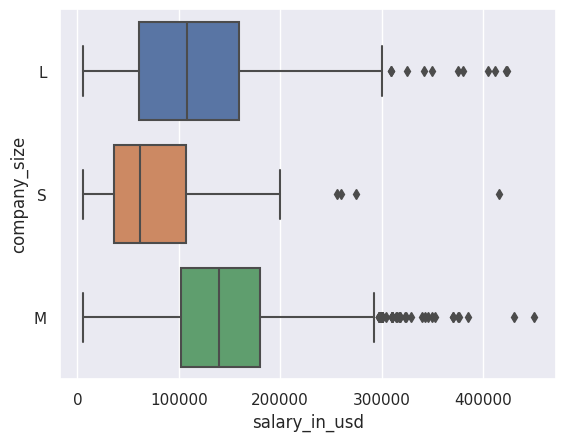

In [ ]:
sns.boxplot(x=data_frame['salary_in_usd'], y=data_frame['company_size'])

A análise multivariável do diagrama de caixa acima apresenta alguns outliers que diferente da interpretação anterior podem ser considerados erros de coleta. Dificilmente uma empresa pequena seria capaz de pagar um salário já considerado altissímo no contexto de uma empresa mediana ou grande.

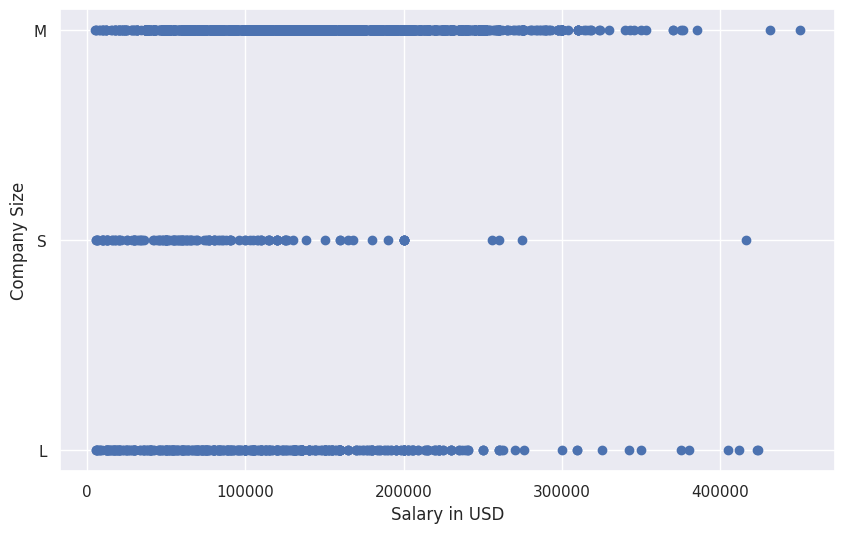

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_frame['salary_in_usd'], data_frame['company_size'])
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Company Size')
plt.show()

A mesma interpretação pode ser aferida do scatter acima sobre organizações de pequeno porte.

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

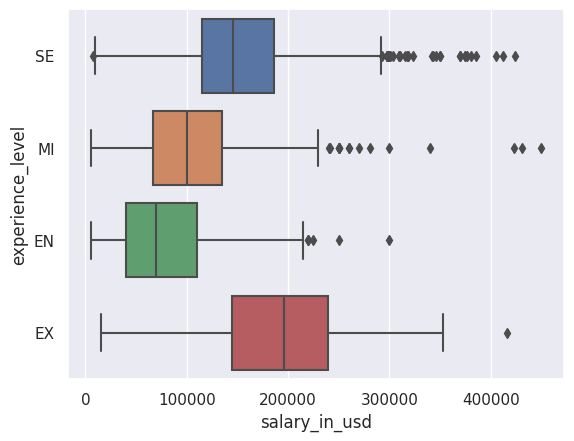

In [ ]:
sns.boxplot(x=data_frame['salary_in_usd'], y=data_frame['experience_level'])

A maioria dos outliers aferidos acima fazem total sentido com o contexto do dataset. A estritabilidade do teto de salário de um cientista de dados torna-se mais suave de acordo com o aumento de experiência.
Existem dois pontos no gráfico bastante suspeitos de serem erros de coleta. Há um cientista de dados EX ganhando tanto quanto um SE, e há um SE que ganha menos que um EX, com certeza um erro de coleta.

In [ ]:
Q1 = data_frame.quantile(0.25)
print("Median of the first half")
print(Q1)
print()

Q3 = data_frame.quantile(0.75)
print("Median of the second half")
print(Q3)
print()

IQR = Q3 - Q1
print("Interquartile range")
print(IQR)

Median of the first half
work_year          2022.0
salary           100000.0
salary_in_usd     95000.0
remote_ratio          0.0
Name: 0.25, dtype: float64

Median of the second half
work_year          2023.0
salary           180000.0
salary_in_usd    175000.0
remote_ratio        100.0
Name: 0.75, dtype: float64

Interquartile range
work_year            1.0
salary           80000.0
salary_in_usd    80000.0
remote_ratio       100.0
dtype: float64


<ipython-input-101-3bff442ed197>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data_frame.quantile(0.25)
<ipython-input-101-3bff442ed197>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data_frame.quantile(0.75)


Acima o cálculo da amplitude interquartil. A amplitude interquartil é justamente o range da caixa central do diagrama de caixa. 

In [ ]:
data_frame.shape

(3755, 11)

Antes da remoção de outliers utilizando IQR.

In [ ]:
data_frame = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]
data_frame.shape

<ipython-input-103-d04a1c29e6d5>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_frame = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]


(3557, 11)

Depois da remoção de outliers utilizando IQR.

198 outliers foram removidos.

<Axes: xlabel='salary_in_usd'>

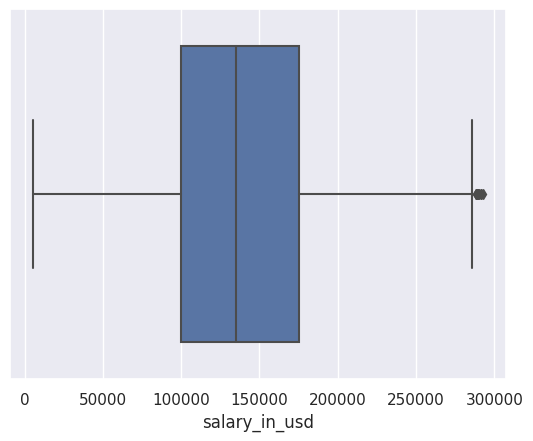

In [ ]:
sns.boxplot(x=data_frame['salary_in_usd'])

Para fins didáticos removi outliers indiscriminadamente, independente da interpretação sobre serem erros de coleta ou variância natural do dataset. Não sei como faria para remover levando em consideração minhas interpretações. Mas tenho algumas ideias:

Uma possibilidade viável é alterar o valor '1.5', do trecho de código que aplica a técnica de remoção por IQR, que dimensiona o intervalo em que um valor será considerado um outlier proveniente de erro. 

Por exemplo:<br> `data_frame = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 2.5 * IQR))).any(axis=1)]`
<br>
Dessa forma o intervalo que checa outliers após o terceiro quartil seria maior, permitindo assim outliers maiores após o limite superior.

Porém seria preciso também avaliar esses outliers coluna por coluna, com uma alteração específica no cálculo para cada uma. E mais interessante ainda seria tratar os outliers observando relações multivariáveis, como na análise anterior entre 'salary_in_usd' e 'company_size'.